In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price/car_price_prediction_.csv


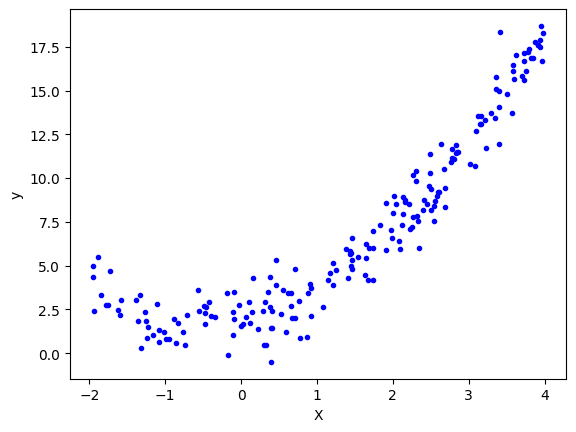

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
X = 6*np.random.rand(200, 1)-2
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

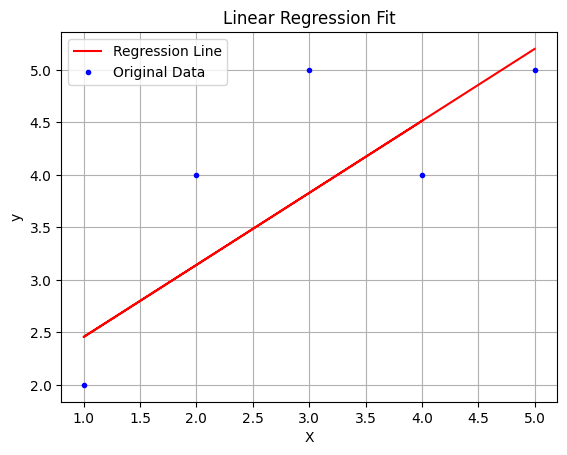

In [7]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import numpy as np
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

plt.plot(X_train, lr.predict(X_train), color='r', label='Regression Line')
plt.plot(X, y, 'b.', label='Original Data')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()


R² Score: 1.0


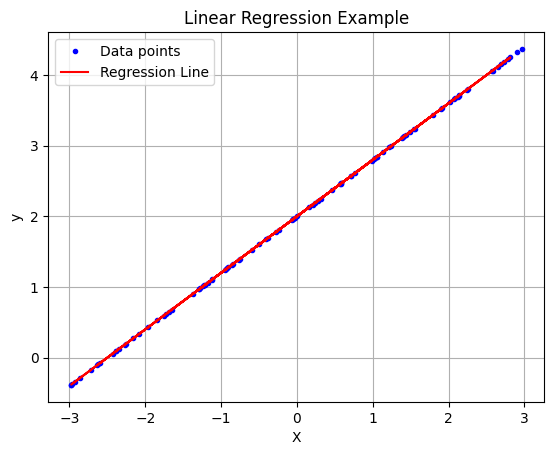

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(100, 1) - 3
y = 0.8 * X + 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

score = r2_score(y_test, y_pred)
print("R² Score:", score)

plt.plot(X, y, 'b.', label='Data points')  # blue dots
plt.plot(X_test, y_pred, 'r-', label='Regression Line')  # red line
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Example")
plt.legend()
plt.grid(True)
plt.show()


X_train[0]: [-0.95091403]
X_train_trans[0]: [ 1.         -0.95091403  0.9042375 ]
R² score: 1.0
Coefficients: [[0.  0.8 0.5]]
Intercept: [2.]


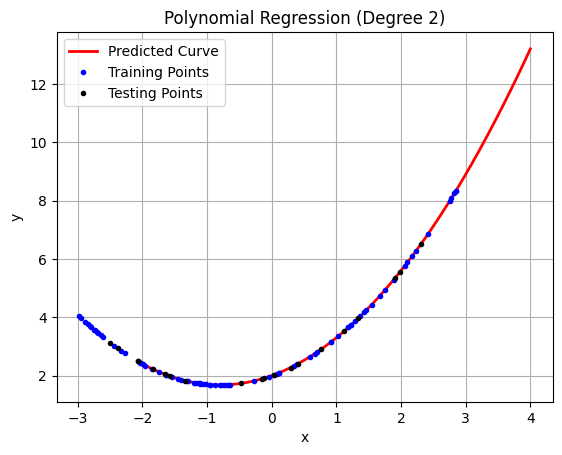

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(100, 1) - 3
y = 0.8 * X + 2 + 0.5 * X**2  # Adding quadratic term to make it polynomial

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)  # Use transform, not fit_transform

print("X_train[0]:", X_train[0])
print("X_train_trans[0]:", X_train_trans[0])

lr = LinearRegression()
lr.fit(X_train_trans, y_train)

y_pred = lr.predict(X_test_trans)
print("R² score:", r2_score(y_test, y_pred))

print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

X_new = np.linspace(-2, 4, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

plt.plot(X_new, y_new, 'r-', linewidth=2, label="Predicted Curve")
plt.plot(X_train, y_train, 'b.', label="Training Points")
plt.plot(X_test, y_test, 'k.', label="Testing Points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.grid(True)
plt.show()


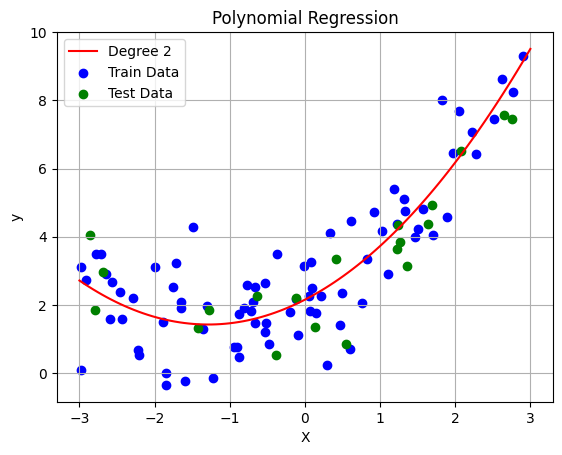

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Generate synthetic data
X = np.random.rand(100, 1) * 6 - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define polynomial regression function
def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)

    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_model = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])

    polynomial_model.fit(X_train, y_train)
    y_new = polynomial_model.predict(X_new)

    plt.plot(X_new, y_new, 'r', label=f"Degree {degree}")
    plt.scatter(X_train, y_train, color='blue', label="Train Data")
    plt.scatter(X_test, y_test, color='green', label="Test Data")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.title("Polynomial Regression")
    plt.grid(True)
    plt.show()

polynomial_regression(2)


In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=44, include_bias=False)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

print("Original X_train sample:", X_train[0])
print("Transformed X_train sample:", X_train_trans[0])


Original X_train sample: [1.89243683]
Transformed X_train sample: [1.89243683e+00 3.58131715e+00 6.77741647e+00 1.28258325e+01
 2.42720779e+01 4.59333741e+01 8.69260087e+01 1.64501980e+02
 3.11309606e+02 5.89133764e+02 1.11489843e+03 2.10987485e+03
 3.99280487e+03 7.55613100e+03 1.42995006e+04 2.70609015e+04
 5.12110467e+04 9.69136708e+04 1.83403000e+05 3.47078591e+05
 6.56824309e+05 1.24299851e+06 2.35229616e+06 4.45157189e+06
 8.42431859e+06 1.59424908e+07 3.01701567e+07 5.70951156e+07
 1.08048900e+08 2.04475717e+08 3.86957377e+08 7.32292392e+08
 1.38581709e+09 2.62257130e+09 4.96305052e+09 9.39225959e+09
 1.77742579e+10 3.36366603e+10 6.36552548e+10 1.20463549e+11
 2.27969656e+11 4.31418173e+11 8.16431639e+11 1.54504530e+12]
